In [ ]:
pip install pandas matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Customer

In [ ]:
import pandas as pd
import os

# Define the file path
file_path = os.path.expanduser("~/Downloads/DataGotTalentFile/vongsoloai_data_final.xlsx")

try:
    # Check if the file exists
    if os.path.exists(file_path):
        # Read the Excel file
        dfc = pd.read_excel(file_path, sheet_name="customer")
        # Display the DataFrame
        print(dfc)
    else:
        print(f"File '{file_path}' does not exist.")
except PermissionError:
    print(f"Permission denied: Unable to access file '{file_path}'.")
except Exception as e:
    print(f"An error occurred: {e}")


In [4]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4479 entries, 0 to 4478
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerid  4479 non-null   object
 1   DOB         4479 non-null   int64 
 2   gender      4479 non-null   object
 3   address     4478 non-null   object
 4   Website     3943 non-null   object
 5   job         4479 non-null   object
 6   industry    3357 non-null   object
dtypes: int64(1), object(6)
memory usage: 245.1+ KB


In [5]:
from datetime import datetime, timedelta

def get_dob(number_of_days):
    # Reference date (January 1, 1900)
    reference_date = datetime(1900, 1, 1)

    # convert
    result_date = reference_date + timedelta(days=number_of_days - 2)
#     print(result_date.strftime("%Y-%m-%d"))
    return result_date.year
dfc['YOB'] = dfc['DOB'].apply(get_dob)

In [6]:
dfc['YOB'] = dfc['DOB'].apply(get_dob)

In [7]:
dfc

,customerid,DOB,gender,address,Website,job,industry,YOB
0,0000000014,36268,Nữ,hoa khe quan thanh khe,KH0104|0345,student,computer,1999
1,0000000034,35901,Nam,man thai,KH0104|0333,student,health service,1998
2,0000000051,34319,Nam,que son quang nam,KH0104|0255,blue collar,economics,1993
3,0000000081,36472,Nam,truong chinh,KH0104|0293,student,economics,1999
4,0000000098,34608,Nam,cẩm lệ,KH0104|40580,blue collar,health service,1994
...,...,...,...,...,...,...,...,...
4474,KH9855766,34885,Nữ,"A, THUAN PHUOC,HAI CHAU, DA NANG",NaN,specialist,finance,1995
4475,KH9958204,36892,Nữ,"Phước Mỹ, ĐN",NaN,teenager,NaN,2001
4476,WEBS00000043900,32311,Nữ,nguyen gian thanh,KHWEBS|00006890,specialist,construction,1988
4477,WEBS00000044909,35316,Nữ,ngũ hành sơn,KHWEBS|00007899,blue collar,finance,1996


In [8]:
dfc['gender'].value_counts()

gender
Nữ     2405
Nam    2074
Name: count, dtype: int64

In [9]:
dfc['job'].value_counts()

job
student         1251
teenager        1122
specialist       725
white collar     697
blue collar      684
Name: count, dtype: int64

In [10]:
dfc['industry'].value_counts()

industry
finance             398
health service      395
computer            382
engineering         382
social service      372
economics           365
education           359
government agent    356
construction        348
Name: count, dtype: int64

In [11]:
dfc['YOB'].value_counts()

YOB
1999    464
1997    432
2000    403
1996    393
1995    356
1998    355
1994    302
2001    255
1993    220
1992    207
2002    191
1991    152
2003    141
1990    100
1989     73
1988     54
2004     41
2005     40
1987     35
1984     30
1985     28
1986     26
1983     21
1982     19
2017     17
1980     13
1981     13
1979     13
2006     10
1977      8
1975      7
1978      7
2016      6
1976      5
2019      5
2007      4
1971      4
2008      4
1969      3
1970      3
1974      3
1972      3
1965      2
1964      2
1973      2
1967      1
1966      1
9997      1
7980      1
4352      1
2094      1
2020      1
Name: count, dtype: int64

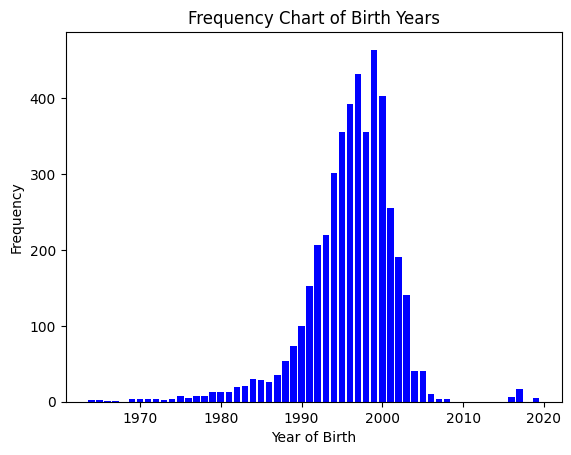

In [12]:
# Calculate the frequency of each birth year
unique_years, counts = np.unique(dfc['YOB'], return_counts=True)
unique_years_ = []
counts_ = []
for i in range(len(unique_years)):
    if unique_years[i] <= 2019:
        unique_years_.append(unique_years[i])
        counts_.append(counts[i])
        

# Creat chart
plt.bar(unique_years_, counts_, color='blue')
plt.xlabel('Year of Birth')
plt.ylabel('Frequency')
plt.title('Frequency Chart of Birth Years')
plt.show()

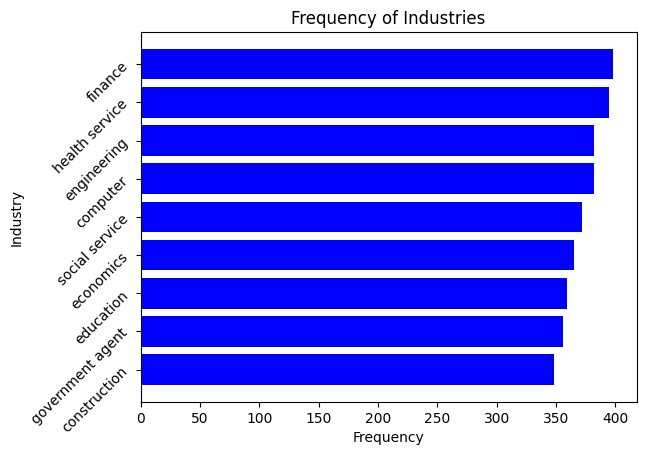

In [13]:
# Sort the DataFrame by frequency in ascending order
sorted_df = dfc['industry'].value_counts().sort_values(ascending=True)

# Create the chart with y-axis on the bottom
plt.barh(sorted_df.index, sorted_df, color='blue')

# Adjust y-axis labels
plt.yticks(rotation=45, ha='right')
plt.ylabel('Industry')

# Adjust x-axis label and other properties
plt.xlabel('Frequency')
plt.title('Frequency of Industries')

# Display the chart
plt.show()




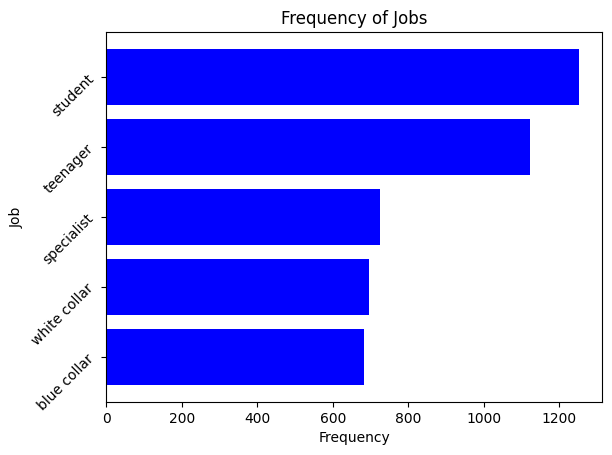

In [14]:
# Sort the DataFrame by frequency in ascending order
sorted_df = dfc['job'].value_counts().sort_values(ascending=True)

# Plot the chart
plt.barh(sorted_df.index, sorted_df, color='blue')

# Set the y-axis labels and rotate them for better readability
plt.yticks(rotation=45, ha='right')

# Set labels for the x-axis and y-axis
plt.ylabel('Job')
plt.xlabel('Frequency')

# Set the title for the chart
plt.title('Frequency of Jobs')

# Display the chart
plt.show()





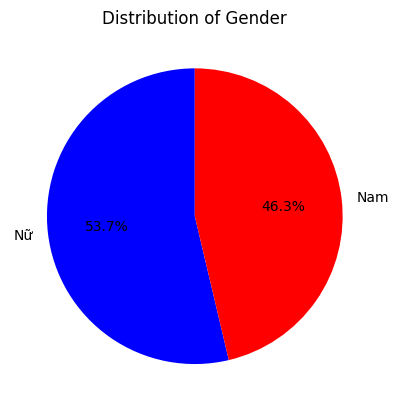

In [15]:
# Calculate the frequency of genders
gender_counts = dfc['gender'].value_counts()

# Plot a pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'red', 'green', 'orange'])

# Set the title for the chart
plt.title('Distribution of Gender')

# Display the chart
plt.show()


**Some conclusions**

The cinema's customers mainly belong to the age group from 1990 to 2005, including those in their 20s, Generation Z, and young members, predominantly students (note that the data is from 2019, so those born in 1990 would be under 30 years old at that time).

# Film

In [16]:
import pandas as pd
import os

In [ ]:
# Define the file path
file_path = os.path.expanduser("~/Downloads/DataGotTalentFile/vongsoloai_data_final-FilmCorrected.xlsx")

try:
    # Read the Excel file
    dfc = pd.read_excel(file_path, sheet_name="FilmMay19")
    
    # Display the first few rows of the DataFrame
    print(dfc.head())
    
except FileNotFoundError:
    print(f"File not found at path: {file_path}")
except ValueError as ve:
    print(f"Error reading worksheet: {ve}")
except Exception as e:
    print(f"An error occurred: {e}")




In [18]:
dfc['title'].value_counts()

title
Aladdin                                      2
Eiga Doraemon: Nobita no getsumen tansaki    2
Avengers: Endgame                            1
The Hustle                                   1
The Queen's Corgi                            1
Sang krasue                                  1
Vo ba (The Third Wife)                       1
Lat Mat 4: Nha Co Khach                      1
Godzilla: King of the Monsters               1
Uoc Hen Mua Thu                              1
John Wick: Chapter 3 - Parabellum            1
Inseparable Bros                             1
Pokémon: Detective Pikachu                   1
The Curse of La Llorona                      1
Vo Gian Dao                                  1
Pee Nak                                      1
Ca Chon, Anh Dung Di!                        1
Name: count, dtype: int64

In [19]:
dfc['country'].value_counts()

country
United States    7
Vietnam          5
Japan            3
Thailand         2
South Korea      1
Belgium          1
Name: count, dtype: int64

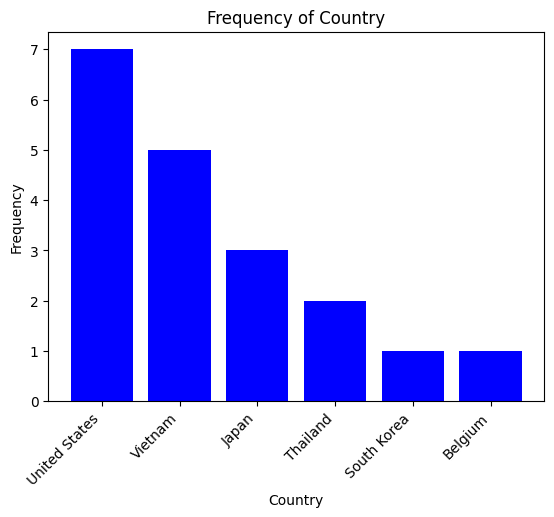

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data
# Calculate the frequency of countries
frequency = dfc['country'].value_counts()

# Plot the chart
plt.bar(frequency.index, frequency, color='blue')

# Set the x-axis labels and rotate them for better readability
plt.xticks(rotation=45, ha='right')

# Set labels for the x-axis and y-axis
plt.xlabel('Country')
plt.ylabel('Frequency')

# Set the title for the chart
plt.title('Frequency of Country')

# Display the chart
plt.show()



In [21]:
dfc['director'].value_counts()

director
Guy Ritchie                     2
Shinnosuke Yakuwa               2
Anthony Russo, Joe Russo        1
Chris Addison                   1
Vincent Kesteloot               1
Sitisiri Mongkolsiri            1
Ash Mayfair                     1
Ly Hai                          1
Michael Dougherty               1
Quang Dung Nguyen               1
Chad Stahelski                  1
Sang-Hyo Yook                   1
Rob Letterman                   1
Michael Chaves                  1
Tran Viet Anh                   1
Phontharis Chotkijsadarsopon    1
Do Cuong                        1
Name: count, dtype: int64

In [22]:
dfc['duration'].value_counts()

duration
111 min    3
93 min     2
128 min    2
181 min    1
130 min    1
108 min    1
113 min    1
104 min    1
114 min    1
132 min    1
100 min    1
96 min     1
122 min    1
85 min     1
90 min     1
Name: count, dtype: int64

In [23]:
dfc['listed_in'].value_counts()

listed_in
Comedy, Horror                                                   2
Adventure, Comedy, Family, Fantasy, Musical, Romance             2
Animation, Action, Adventure, Comedy, Family, Fantasy, Sci-Fi    2
Action, Adventure, Drama                                         1
Action, Crime, Thriller                                          1
Comedy, Crime, Thriller                                          1
Horror, Mystery, Thriller                                        1
Action, Adventure, Comedy, Family, Mystery, Sci-Fi               1
Comedy, Drama                                                    1
Comedy, Romance                                                  1
Comedy, Crime                                                    1
Action, Adventure, Fantasy, Sci-Fi                               1
Drama                                                            1
Drama, Horror, Romance                                           1
Animation, Comedy, Family                           

In [24]:
category = []
for con in dfc['listed_in']:
    if pd.isna(con):
        continue
    con = con.split(", ")
    category += con
    
print(category)
# Convert the list into a Series
category_series = pd.Series(category)

# Calculate the frequency of each category
category_frequency = category_series.value_counts()

# Print the frequency
print(category_frequency)


['Action', 'Adventure', 'Drama', 'Action', 'Crime', 'Thriller', 'Comedy', 'Horror', 'Comedy', 'Crime', 'Thriller', 'Horror', 'Mystery', 'Thriller', 'Action', 'Adventure', 'Comedy', 'Family', 'Mystery', 'Sci-Fi', 'Adventure', 'Comedy', 'Family', 'Fantasy', 'Musical', 'Romance', 'Comedy', 'Drama', 'Comedy', 'Romance', 'Adventure', 'Comedy', 'Family', 'Fantasy', 'Musical', 'Romance', 'Comedy', 'Crime', 'Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'Animation', 'Action', 'Adventure', 'Comedy', 'Family', 'Fantasy', 'Sci-Fi', 'Comedy', 'Horror', 'Drama', 'Drama', 'Horror', 'Romance', 'Animation', 'Comedy', 'Family', 'Romance', 'Animation', 'Action', 'Adventure', 'Comedy', 'Family', 'Fantasy', 'Sci-Fi']
Comedy       12
Adventure     7
Action        6
Family        6
Fantasy       5
Romance       5
Drama         4
Horror        4
Sci-Fi        4
Crime         3
Thriller      3
Animation     3
Mystery       2
Musical       2
Name: count, dtype: int64


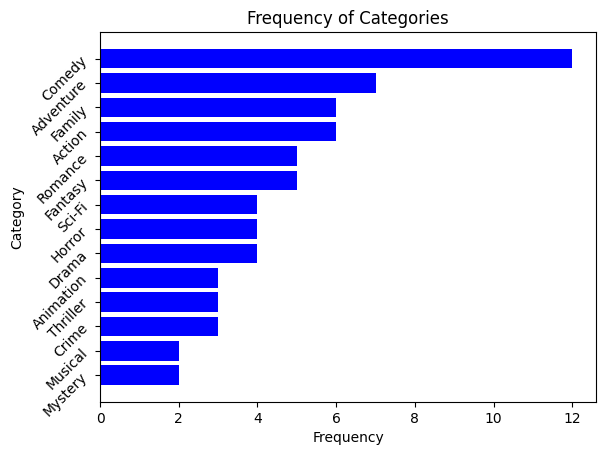

In [25]:
# Sort the category frequency Series by values in descending order
category_frequency_sorted = category_frequency.sort_values(ascending=True)

# Plot the bar chart with switched axes and sorted values
plt.barh(category_frequency_sorted.index, category_frequency_sorted, color='Blue')

# Set the y-axis labels and rotate them for better readability
plt.yticks(rotation=45, ha='right')

# Set labels for y-axis and x-axis (switched due to axes being switched)
plt.ylabel('Category')
plt.xlabel('Frequency')

# Set the title for the plot
plt.title('Frequency of Categories')

# Show the plot
plt.show()





**Here are some conclusions**

There are a wide variety of movie genres and types being screened.
The majority of movies being screened are American.
The movie durations are relatively short, on average, each viewer watches 99 minutes, with the most frequently watched movie duration being 45 minutes

# Ticket

In [41]:
# Define the file path
file_path = os.path.expanduser("~/Downloads/DataGotTalentFile/vongsoloai_data_final-FilmCorrected.xlsx")

try:
    # Read the Excel file
    dfc = pd.read_excel(file_path, sheet_name="ticket")
    
    # Display the first few rows of the DataFrame
    print(dfc.head())
    
except FileNotFoundError:
    print(f"File not found at path: {file_path}")
except ValueError as ve:
    print(f"Error reading worksheet: {ve}")
except Exception as e:
    print(f"An error occurred: {e}")

            orderid cashier            saledate    total  customerid  \
0  10006052019B0225  emp002 2019-05-06 16:40:43  90000.0  0000000014   
1  10006052019B0225  emp002 2019-05-06 16:40:43  90000.0  0000000014   
2  10022052019B0167  emp011 2019-05-22 20:30:28  90000.0  0000000034   
3  10022052019B0167  emp011 2019-05-22 20:30:28  90000.0  0000000034   
4  10130052019B0141  emp005 2019-05-30 19:28:44  90000.0  0000000034   

   ticketcode       date      time slot  room  \
0    20074925 2019-05-06  18:15:00  G04     3   
1    20074924 2019-05-06  18:15:00  G03     3   
2    20097042 2019-05-22  20:45:00  E04     2   
3    20097041 2019-05-22  20:45:00  E03     2   
4    20106761 2019-05-30  19:30:00  F04     1   

                                      film slot type ticket_type  \
0                        AVENGERS: HỒI KẾT       ĐƠN  Thành viên   
1                        AVENGERS: HỒI KẾT       ĐƠN  Thành viên   
2  JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18)       ĐƠN  Thành viên   


In [42]:
# Now you can count the total number of orderid
dfc['orderid'].count()


35378

In [34]:
dfc['cashier'].value_counts()

cashier
emp011     5894
emp006     5608
emp012     4190
emp014     3778
emp005     2622
emp008     2272
emp002     2232
emp010     2133
emp007     2041
emp004     1907
emp009      825
emp001      678
emp003      502
emp015      469
emp013      227
Website      96
Name: count, dtype: int64

In [35]:
dfc['saledate'].value_counts()

saledate
2019-05-26 18:11:38    43
2019-05-11 14:14:16    32
2019-05-21 19:07:58    27
2019-05-15 12:22:58    27
2019-05-23 13:07:42    23
                       ..
2019-05-25 18:01:44     1
2019-05-25 15:44:49     1
2019-05-25 14:44:54     1
2019-05-02 14:06:34     1
2019-05-27 19:55:03     1
Name: count, Length: 14544, dtype: int64

In [43]:
dfc['ticket_price'].value_counts()

ticket_price
45000     33264
90000      1383
75000       799
160000       28
Name: count, dtype: int64

In [44]:
dfc['total'].sum()

5758295000.0

In [50]:
# Remove duplicate rows based on 'orderid'
df_unique = dfc.drop_duplicates(subset='orderid')

# Calculate revenue by orderid
revenue_by_orderid = df_unique.groupby('orderid')['total'].sum()

# Calculate total revenue
total_revenue = revenue_by_orderid.sum()

# Display the results
print(revenue_by_orderid)
print("Total revenue: ", total_revenue)


orderid
10001052019B0003    160000.0
10001052019B0004     75000.0
10001052019B0005    225000.0
10001052019B0006    150000.0
10001052019B0007    160000.0
                      ...   
9931052019B0010     135000.0
9931052019B0011      90000.0
9931052019B0012     180000.0
9931052019B0013     135000.0
9931052019B0014      45000.0
Name: total, Length: 14598, dtype: float64
Total revenue:  1682360000.0


In [51]:
dfc['customerid'].value_counts()[:60]

customerid
KH6166700     10132
0000029127     7105
0001121703      507
KH3742976        54
0003004563       52
0001161670       45
0001123637       43
0001169541       38
0001080292       32
KH647128         31
0003009776       30
0001077661       28
0001122142       27
0001007522       27
0001136590       26
0000000576       25
0001122683       25
0001083859       24
0001123511       23
0001139934       22
0001023125       22
0001079962       22
0000000622       21
0001191104       21
0001015472       21
0000026616       20
0005008250       20
0003004573       19
0000026756       19
0003009665       19
0003009632       19
0001186554       19
KH7890071        19
0001083486       19
0001023399       19
0001121706       18
0001191143       18
0000024047       18
0003009605       18
0001023290       18
0001138214       18
0001029069       17
0001118832       17
0001077680       17
0001082291       17
0001122820       17
0005008183       17
0001119439       17
0003009704       17
000500818

In [52]:
dfc[dfc['customerid'] == "KH6166700"].head(30)

,orderid,cashier,saledate,total,customerid,ticketcode,date,time,slot,room,film,slot type,ticket_type,ticket_price,popcorn
24700,10121052019B0057,emp001,2019-05-21 20:43:10,45000.0,KH6166700,20096318,2019-05-21,20:45:00,F16,2,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),ĐƠN,Thành viên,45000,Không
24701,10121052019B0061,emp001,2019-05-21 20:56:02,90000.0,KH6166700,20096349,2019-05-21,20:40:00,F05,1,MẸ MA THAN KHÓC LA LLORONA (C18),ĐƠN,Thành viên,45000,Không
24702,10121052019B0061,emp001,2019-05-21 20:56:02,90000.0,KH6166700,20096350,2019-05-21,20:40:00,F06,1,MẸ MA THAN KHÓC LA LLORONA (C18),ĐƠN,Thành viên,45000,Không
24703,10021052019B0169,emp006,2019-05-21 19:20:37,90000.0,KH6166700,20096088,2019-05-21,19:40:00,H13,3,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),ĐƠN,Thành viên,45000,Không
24704,10021052019B0169,emp006,2019-05-21 19:20:37,90000.0,KH6166700,20096087,2019-05-21,19:40:00,H12,3,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),ĐƠN,Thành viên,45000,Không
24705,10021052019B0177,emp006,2019-05-21 19:34:36,90000.0,KH6166700,20096158,2019-05-21,19:50:00,G14,4,MẸ MA THAN KHÓC LA LLORONA (C18),ĐƠN,Thành viên,45000,Không
24706,10021052019B0177,emp006,2019-05-21 19:34:36,90000.0,KH6166700,20096157,2019-05-21,19:50:00,G13,4,MẸ MA THAN KHÓC LA LLORONA (C18),ĐƠN,Thành viên,45000,Không
24707,10021052019B0186,emp006,2019-05-21 19:53:01,90000.0,KH6166700,20096224,2019-05-21,20:45:00,E10,2,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),ĐƠN,Thành viên,45000,Không
24708,10021052019B0186,emp006,2019-05-21 19:53:01,90000.0,KH6166700,20096225,2019-05-21,20:45:00,E11,2,JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18),ĐƠN,Thành viên,45000,Không
24709,10021052019B0194,emp006,2019-05-21 20:06:53,90000.0,KH6166700,20096256,2019-05-21,20:40:00,E10,1,MẸ MA THAN KHÓC LA LLORONA (C18),ĐƠN,Thành viên,45000,Không


In [53]:
dfc['ticketcode'].value_counts()

ticketcode
20088849    2
20074925    1
20104041    1
20100308    1
20100305    1
           ..
20090335    1
20090334    1
20079705    1
20079704    1
20077796    1
Name: count, Length: 35473, dtype: int64

In [54]:
dfc['date'].value_counts()

date
2019-05-11    2094
2019-05-12    2069
2019-05-05    1906
2019-05-26    1585
2019-05-31    1566
2019-05-25    1504
2019-05-10    1469
2019-05-19    1430
2019-05-09    1397
2019-05-18    1336
2019-05-02    1284
2019-05-24    1229
2019-05-06    1221
2019-05-16    1180
2019-05-30    1135
2019-05-08    1114
2019-05-07    1083
2019-05-17    1046
2019-05-23    1013
2019-05-15     988
2019-05-27     943
2019-05-20     937
2019-05-13     931
2019-05-14     922
2019-05-28     909
2019-05-21     854
2019-05-01     827
2019-05-29     695
2019-05-22     653
2019-05-03     154
Name: count, dtype: int64

In [55]:
dfc['time'].value_counts()

time
19:15:00    1583
19:35:00    1089
19:30:00    1087
15:00:00     972
19:00:00     922
            ... 
12:34:00      23
10:25:00      18
10:31:00      10
07:30:00       8
08:44:00       7
Name: count, Length: 159, dtype: int64

In [56]:
dfc['slot'].value_counts()

slot
G09    597
F09    591
G08    587
F08    573
F10    573
      ... 
B17     28
A16     27
K01     25
I19     23
A17     19
Name: count, Length: 190, dtype: int64

In [58]:
dfc['room'].value_counts()

room
4    9992
2    8822
3    8495
1    8165
Name: count, dtype: int64

In [59]:
dfc['film'].value_counts()

film
MẸ MA THAN KHÓC LA LLORONA (C18)                       9630
AVENGERS: HỒI KẾT                                      7315
NGÔI ĐỀN KỲ QUÁI (C18)                                 3788
JOHN WICK 3: CHUẨN BỊ CHIẾN TRANH (C18)                3135
POKÉMON: THÁM TỬ PIKACHU (C13)                         2844
CHÚA TỂ GODZILLA: ĐẾ VƯƠNG BẤT TỬ (C13)                1477
ALADDIN (PD) (G)                                       1283
ALADDIN (LT) (G)                                       1225
ƯỚC HẸN MÙA THU                                        1003
(LT) DORAEMON: NOBITA VÀ MẶT TRĂNG PHIÊU LƯU KÝ (G)     922
THẰNG EM LÝ TƯỞNG                                       706
LẬT MẶT: NHÀ CÓ KHÁCH                                   613
VỢ BA                                                   507
VÔ GIAN ĐẠO (C18)                                       429
QUÝ CÔ LỪA ĐẢO                                          252
NỤ HÔN MA QUÁI (C18)                                    175
CÀ CHỚN ANH ĐỪNG ĐI                

In [60]:
dfc['slot type'].value_counts()

slot type
ĐƠN    34063
ĐÔI     1411
Name: count, dtype: int64

In [62]:
dfc['ticket_type'].value_counts()

ticket_type
Thành viên    35474
Name: count, dtype: int64

In [66]:
dfc['popcorn'].value_counts()

popcorn
Không    35287
Có          91
Name: count, dtype: int64

In [67]:
dfc[dfc['ticket_price'] == 160000]

,orderid,cashier,saledate,total,customerid,ticketcode,date,time,slot,room,film,slot type,ticket_type,ticket_price,popcorn
1799,10001052019B0003,emp008,2019-05-01 07:05:53,160000.0,0000024994,20068404,2019-05-01,07:30:00,H05,2,AVENGERS: HỒI KẾT,ĐÔI,Thành viên,160000,Không
11520,10001052019B0126,emp008,2019-05-01 11:19:40,160000.0,0001013721,20068943,2019-05-01,14:05:00,H07,2,AVENGERS: HỒI KẾT,ĐÔI,Thành viên,160000,Không
11525,10001052019B0125,emp008,2019-05-01 11:18:43,160000.0,0001013721,20068940,2019-05-01,12:00:00,J04,1,AVENGERS: HỒI KẾT,ĐÔI,Thành viên,160000,Không
16977,12501052019B0012,emp011,2019-05-01 13:45:01,160000.0,0001123511,20069305,2019-05-01,14:05:00,H09,2,AVENGERS: HỒI KẾT,ĐÔI,Thành viên,160000,Không
24280,10101052019B0085,emp006,2019-05-01 11:38:54,320000.0,KH3742976,20068980,2019-05-01,12:00:00,J08,1,AVENGERS: HỒI KẾT,ĐÔI,Thành viên,160000,Không
24281,10101052019B0085,emp006,2019-05-01 11:38:54,320000.0,KH3742976,20068981,2019-05-01,12:00:00,J09,1,AVENGERS: HỒI KẾT,ĐÔI,Thành viên,160000,Không
24288,10101052019B0086,emp006,2019-05-01 11:41:14,160000.0,KH3742976,20068983,2019-05-01,12:00:00,J01,1,AVENGERS: HỒI KẾT,ĐÔI,Thành viên,160000,Không
32322,10001052019B0037,emp008,2019-05-01 08:38:16,160000.0,KH6166700,20068483,2019-05-01,08:45:00,J07,1,AVENGERS: HỒI KẾT,ĐÔI,Thành viên,160000,Không
32343,10001052019B0132,emp008,2019-05-01 11:37:38,320000.0,KH6166700,20068977,2019-05-01,12:00:00,J06,1,AVENGERS: HỒI KẾT,ĐÔI,Thành viên,160000,Không
32344,10001052019B0132,emp008,2019-05-01 11:37:38,320000.0,KH6166700,20068978,2019-05-01,12:00:00,J07,1,AVENGERS: HỒI KẾT,ĐÔI,Thành viên,160000,Không


In [69]:
dfc['day_of_date'] = dfc['date'].apply(lambda x: x.day)
dfc['month_of_date'] = dfc['date'].apply(lambda x: x.month)

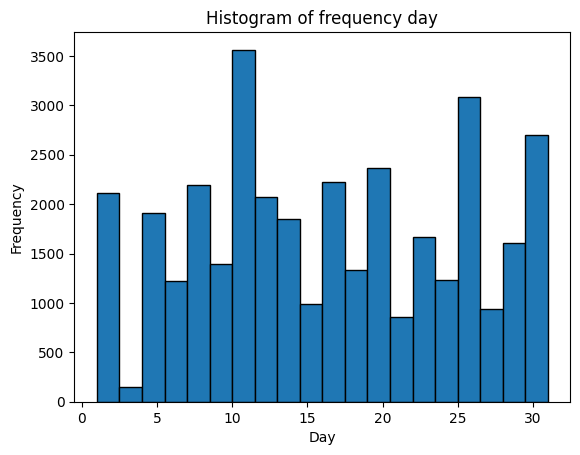

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Create histogram
plt.hist(dfc['day_of_date'], bins=20, edgecolor='black')

# Set title and labels
plt.title('Histogram of frequency day')
plt.xlabel('Day')
plt.ylabel('Frequency')

# Display histogram
plt.show()



In [74]:
dfc['hour_of_time'] = dfc['time'].apply(lambda x: x.hour)

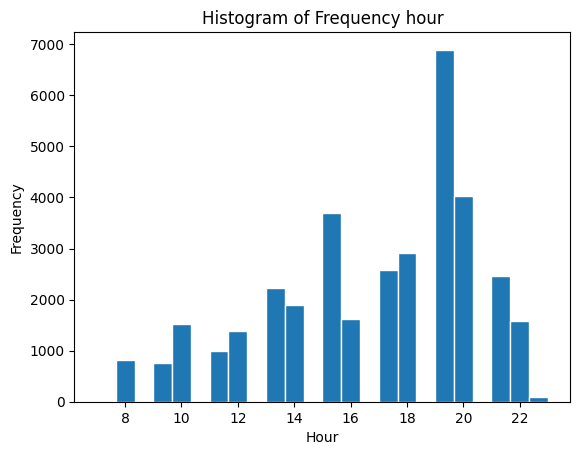

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Create histogram
plt.hist(dfc['hour_of_time'], bins=24, edgecolor='white')

# Set title and labels
plt.title('Histogram of Frequency hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')

# Display histogram
plt.show()



**Finding**

Low coverage. This cinema is cheap

Action neeed:
1.Increase the ratio of popcorn and drinks
2.Offer programs for couples, groups during off-peak hours
3.Issue membership cards to increase return rate (Membership card/VIP card)
4.Improve customer service for better care
5.Sell on website
6.Build a movie viewing website like VieOn, Netflix, K+
7.Trend of watching movies at home
8.Encourage bringing water bottles to the cinema
9.Marketing strategy with Key Opinion Leaders (KOL), artists, inviting them for premiere screenings at the cinema
10.Engage KOLs, artists for promotion.

